### EDA

#### Libraries

In [1]:
! pip install pandas-datareader -q
! pip install yfinance -q
! pip install matplotlib -q


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

#### Pandas Data reader and YFinance

In [3]:
# pdr.get_data_yahoo('TSLA',start='2022-01-01', end='2023-01-01')
df_tesla = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [4]:
# df_tesla.head()
df_tesla.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000
2024-12-31,403.839996,427.929993,402.540009,423.790009,76825100
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300
2025-01-06,411.049988,426.429993,401.700012,423.200012,85248900


#### Setting limits and playing with plots

<Axes: xlabel='Date'>

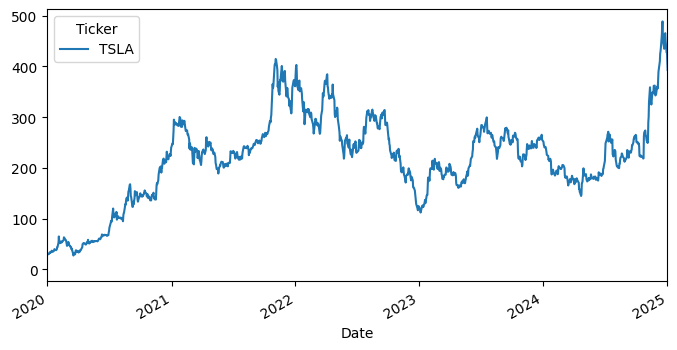

In [5]:
df_tesla['High'].plot(xlim = ['2020-01-01', '2025-01-01'], figsize=(8,4))

<Axes: xlabel='Date'>

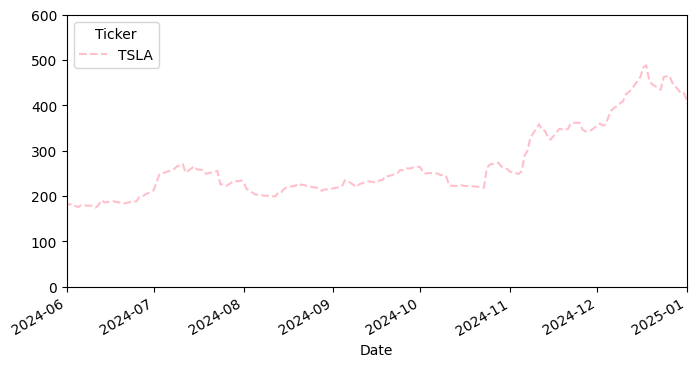

In [6]:
df_tesla['High'].plot(xlim = ['2024-06-01', '2025-01-01'], ylim = [0,600], c='pink', ls='dashed', figsize=(8,4))

#### Indexing

In [7]:
index = df_tesla.loc['2024-06-01':'2025-01-01'].index
share_open =  df_tesla.loc['2024-06-01':'2025-01-01', 'Open']

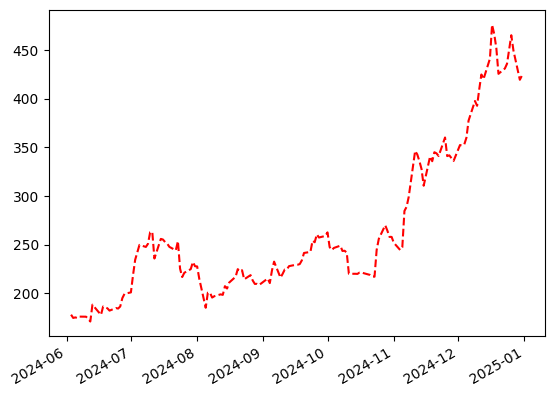

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.tight_layout()
figure, axis = plt.subplots()
figure.autofmt_xdate()
axis.plot(index, share_open, c='red', ls='dashed')

In [9]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2010-06-29 to 2025-01-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3655 non-null   float64
 1   (High, TSLA)    3655 non-null   float64
 2   (Low, TSLA)     3655 non-null   float64
 3   (Open, TSLA)    3655 non-null   float64
 4   (Volume, TSLA)  3655 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 300.4 KB


In [10]:
df_tesla.reset_index(inplace=True)

In [11]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3655 non-null   datetime64[ns]
 1   (Close, TSLA)   3655 non-null   float64       
 2   (High, TSLA)    3655 non-null   float64       
 3   (Low, TSLA)     3655 non-null   float64       
 4   (Open, TSLA)    3655 non-null   float64       
 5   (Volume, TSLA)  3655 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 171.5 KB


In [12]:
pd.to_datetime(df_tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3650   2024-12-30
3651   2024-12-31
3652   2025-01-02
3653   2025-01-03
3654   2025-01-06
Name: Date, Length: 3655, dtype: datetime64[ns]

In [13]:
df_tesla.set_index('Date', inplace=True, drop=True)

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2010-06-29 to 2025-01-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3655 non-null   float64
 1   (High, TSLA)    3655 non-null   float64
 2   (Low, TSLA)     3655 non-null   float64
 3   (Open, TSLA)    3655 non-null   float64
 4   (Volume, TSLA)  3655 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.3 KB


In [15]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


#### Date Time

In [16]:
datetime.now()

datetime.datetime(2025, 1, 7, 15, 40, 26, 972769)

In [17]:
date = datetime(2024,1,2)
print(date)
print(date.date())
print(date.weekday())
print(date.day)
print(date.month)
print(date.year)

2024-01-02 00:00:00
2024-01-02
1
2
1
2024


#### Time Resampling & Plotting

In [18]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


<Axes: xlabel='Date'>

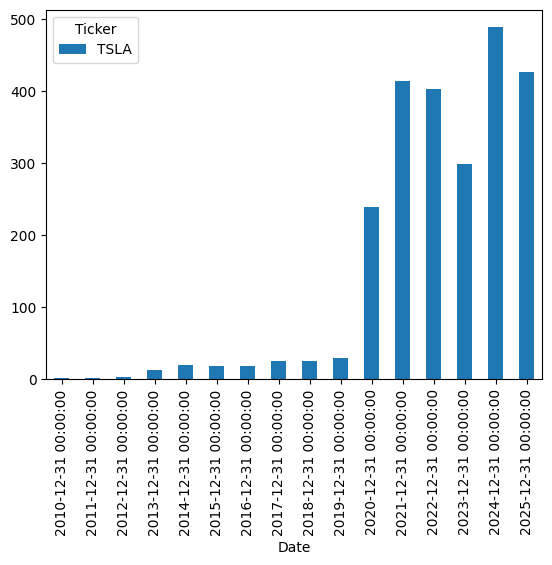

In [19]:
df_tesla.resample(rule='YE').max()['High'].plot(kind='bar')

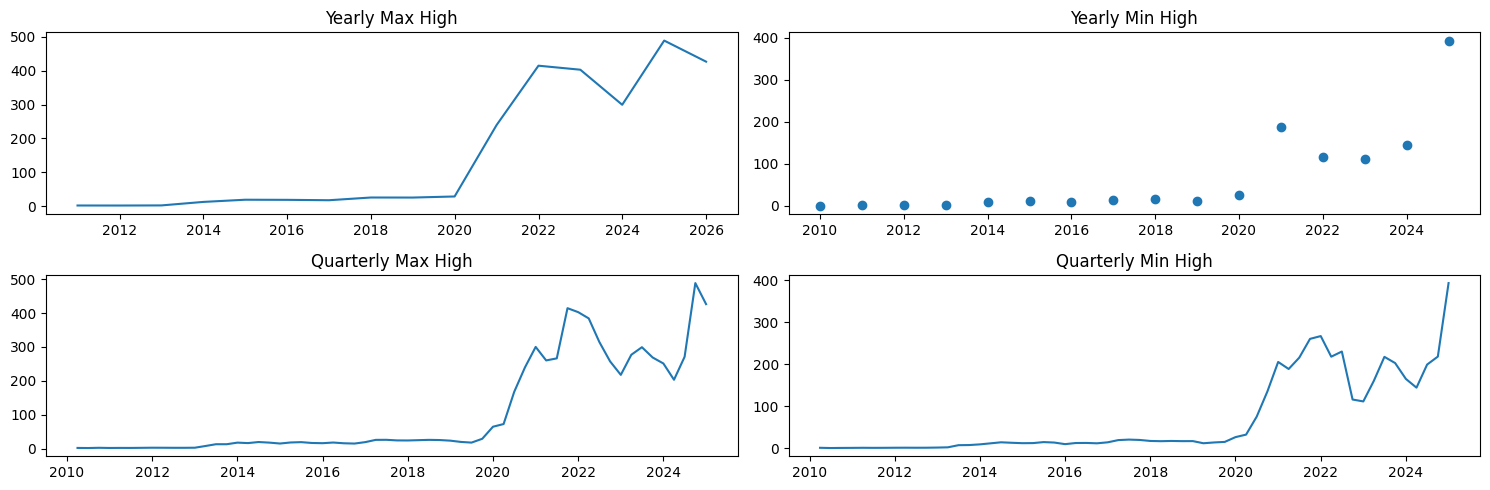

In [20]:
figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
axis[0,0].plot(df_tesla.resample(rule='YE').max()['High'])
axis[0,0].set_title('Yearly Max High')
axis[0,1].scatter(x=df_tesla.resample(rule='YS').min()['High'].index , y=df_tesla.resample(rule='YS').min()['High'])
axis[0,1].set_title('Yearly Min High')
axis[1,0].plot(df_tesla.resample(rule='QS').max()['High'])
axis[1,0].set_title('Quarterly Max High')
axis[1,1].plot(df_tesla.resample(rule='QS').min()['High'])
axis[1,1].set_title('Quarterly Min High')
plt.tight_layout()
plt.show()

#### Aggregate Functions

In [21]:
df_tesla['High'].rolling(10).mean().tail(10)

Ticker,TSLA
Date,
2024-12-20,444.416995
2024-12-23,447.387997
2024-12-24,452.692996
2024-12-26,456.737994
2024-12-27,458.807996
2024-12-30,457.877997
2024-12-31,454.351996
2025-01-02,445.225998
2025-01-03,437.559998


In [22]:
df_tesla['Open - 30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [23]:
df_tesla.tail()

Price,Close,High,Low,Open,Volume,Open - 30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,389.904666
2024-12-31,403.839996,427.929993,402.540009,423.790009,76825100,393.678666
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700,395.324333
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300,396.848333
2025-01-06,411.049988,426.429993,401.700012,423.200012,85248900,399.455000


<Axes: xlabel='Date'>

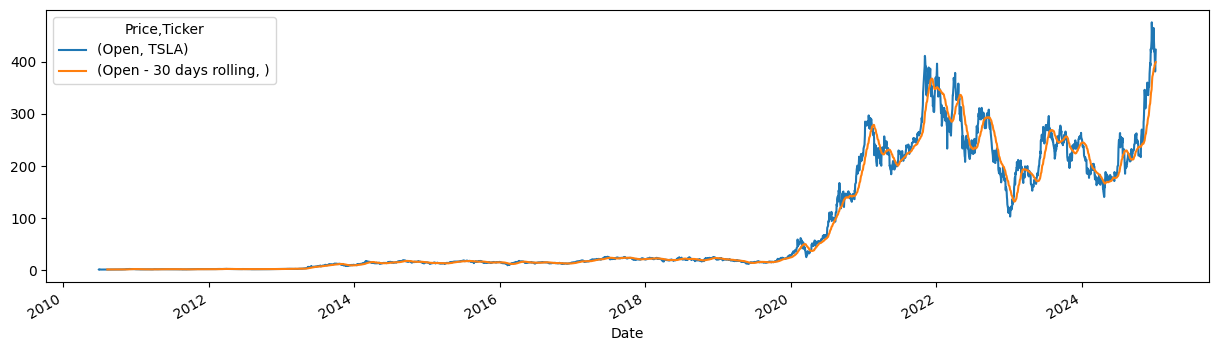

In [24]:
df_tesla[['Open', 'Open - 30 days rolling']].plot(figsize=(15,4))

#### Assignment

##### Q1. Get the maximum price of the share from 2017 to 2022

##### Q2. Which is the date of the highest price of the stock?

##### Q3. Which is the date of the lowest price of the stock?